In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from numpy import genfromtxt
import random
import json
from datetime import datetime , timedelta
import pytz
from pytz import timezone
from numpy import histogram

# 1. soft SVC

In [ ]:
import string
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
from nltk.stem.snowball import SnowballStemmer
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

title_list = []
loc_list = []

def loc_decision(location):
    result = 2
    MA_loc =["Massachusetts","MA","Boston"]
    WA_loc = ["Washington","WA","Seattle","Kirkland"]
    for i in MA_loc:
        if i in location:
            result = 1
    for i in WA_loc:
        if i in location:
            result = 0
    return result

with open("tweets_#superbowl.txt") as file:
    for line in file:
        data = json.loads(line)
        temp_loc = data['tweet']['user']['location']  
        #temp_loc = temp_loc.lower()
        temp_title = data['title']
        #temp_title = temp_title.lower()
        #print(temp_loc.lower())
        if (loc_decision(temp_loc)==0): #is WA    #binarize the locations
            title_list.append(temp_title)
            loc_list.append(0)
        if (loc_decision(temp_loc)==1): #is 麻省
            title_list.append(temp_title)
            loc_list.append(1)
print(len(loc_list))    

stemmer = SnowballStemmer("english")
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc) if w not in stop_words)

t_train, t_test, loc_train, loc_test = train_test_split(title_list, loc_list, test_size=0.2, random_state=42)
#print(t_train)

vect = CountVectorizer(analyzer=stemmed_words,min_df=2 )

#train
train_title = vect.fit_transform(t_train)
transformer=TfidfTransformer()
tf = transformer.fit_transform(train_title)
tf_arr = tf.toarray()
#test
test_title = vect.transform(t_test)
tf_test = transformer.transform(test_title)
tf_arr_test = tf_test.toarray()
#lsi
tsvd = TruncatedSVD(n_components=50,random_state=42)
lsi_train= tsvd.fit_transform(tf_arr)
lsi_test= tsvd.transform(tf_arr_test)

precision is:
0.8213132400430571
accuracy is:
0.7287993282955499
recall is:
0.4872286079182631
confusion matrix is:
[[5523  498]
 [2409 2289]]


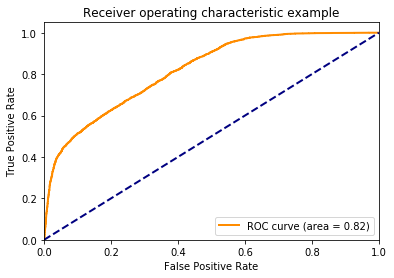

In [18]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l1')
clf.fit(lsi_train,loc_train)

predict_test = clf.predict(lsi_test)
precision = precision_score(loc_test, predict_test) 
accuracy = accuracy_score(loc_test, predict_test)
recall = recall_score(loc_test, predict_test)
conmatrix = confusion_matrix(loc_test, predict_test)


print ("precision is:")
print (precision)
print("accuracy is:")
print(accuracy)
print("recall is:")
print(recall)
print("confusion matrix is:")
print(conmatrix)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(loc_test, clf.decision_function(lsi_test))
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 2. Naive Bayes algorithm

precision is:
0.6065292096219931
accuracy is:
0.6658270361041142
recall is:
0.6762452107279694
confusion matrix is:
[[3960 2061]
 [1521 3177]]


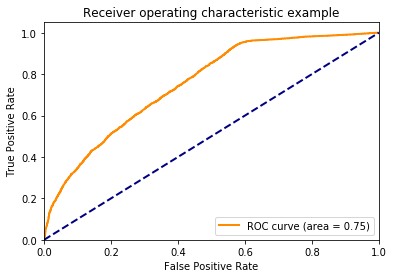

In [24]:
from sklearn.naive_bayes import BernoulliNB


################

#clf = svm.LinearSVC()

clf = BernoulliNB()
clf.fit(lsi_train,loc_train)

predict_test = clf.predict(lsi_test)
precision = precision_score(loc_test, predict_test) 
accuracy = accuracy_score(loc_test, predict_test)
recall = recall_score(loc_test, predict_test)
conmatrix = confusion_matrix(loc_test, predict_test)


print ("precision is:")
print (precision)
print("accuracy is:")
print(accuracy)
print("recall is:")
print(recall)
print("confusion matrix is:")
print(conmatrix)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(loc_test, clf.predict_proba(lsi_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 3. PassiveAgressive

/Users/shaoming/.pyenv/versions/3.6.4/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


precision is:
0.8563268892794376
accuracy is:
0.713032932176509
recall is:
0.41485738612175393
confusion matrix is:
[[5694  327]
 [2749 1949]]


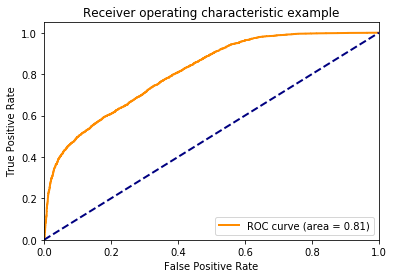

In [22]:
from sklearn import linear_model
from sklearn.linear_model import PassiveAggressiveClassifier

#clf = linear_model.LogisticRegression(penalty = 'l1')
clf = PassiveAggressiveClassifier(random_state=0)

clf.fit(lsi_train,loc_train)

predict_test = clf.predict(lsi_test)
precision = precision_score(loc_test, predict_test) 
accuracy = accuracy_score(loc_test, predict_test)
recall = recall_score(loc_test, predict_test)
conmatrix = confusion_matrix(loc_test, predict_test)


print ("precision is:")
print (precision)
print("accuracy is:")
print(accuracy)
print("recall is:")
print(recall)
print("confusion matrix is:")
print(conmatrix)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, thresholds = roc_curve(loc_test, clf.decision_function(lsi_test))
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()